## 딥러닝 개인 프로젝트

- 서비스의 이탈 고객 예측 모델 생성
- 고객 A가 어느 시점에 이탈을 할 것인지 예측할 수 있도록 모델을 학습시켜 보세요 

- 00 : 학습생 대기 - 무료
- 01 : 학습생 (준) - 무료 
- 02 : 학습생 (일반) - 무료
- 11 : 학습생 (정) - 유료
- 44 : 만료 - 만
- 55 : 정_이월 - 유료

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### 데이터 불러오기

In [2]:
data = pd.read_csv('../deeplearning_n/activity_sample.csv')

In [3]:
data

,Unnamed: 0,userid,learning_seq,mcode,learning_action_seq,event_type,action,object_type,timestamp,gender,...,day_23_status,day_24_status,day_25_status,day_26_status,day_27_status,day_28_status,day_29_status,day_30_status,day_31_status,change_date
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,1,ViewEvent,Viewed,DigitalResource,2022-09-14 23:28:53.150,M,...,11,11,44,44,44,44,44,44,999,25
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,2,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:09.481,M,...,11,11,44,44,44,44,44,44,999,25
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,3,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:09.604,M,...,11,11,44,44,44,44,44,44,999,25
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,4,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:43.752,M,...,11,11,44,44,44,44,44,44,999,25
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,5,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:43.883,M,...,11,11,44,44,44,44,44,44,999,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,3081,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,35,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.026,M,...,1,1,1,1,44,44,44,44,999,27
6472,3082,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,36,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:18.280,M,...,1,1,1,1,44,44,44,44,999,27
6473,3083,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,37,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.366,M,...,1,1,1,1,44,44,44,44,999,27
6474,3084,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,38,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:40.089,M,...,1,1,1,1,44,44,44,44,999,27


In [4]:
data['userid'].unique()

array(['01cf7916-eb98-4d30-8c81-dd52aa5be060',
       '076bf224-16b8-48ca-b646-752a771b1dcc',
       '2bd83b70-6085-48d1-8433-6bef1f4fa584',
       '3a23c7e1-861a-41ce-a856-f16a4df5a5df',
       '4e478763-9937-4d47-b7da-a0113f860b52',
       '4ef416c9-de60-499e-b971-a780e076991e',
       '5b531894-59c3-4cf3-8fa4-eb1836fbd6b3',
       '676a004e-7c59-4edb-8af1-3bd963b98b29',
       '78d436d5-2adb-489b-bc1c-8c5b85d47d5c',
       '7aa6cf37-81af-4af8-a272-6a850e65e25c',
       '909c25d9-64ef-4e4f-b47f-4df50f02c07f',
       '91749c9e-af85-4f73-b252-2d05c04b508f',
       '943ee87d-d6d7-4ad4-b7dd-4ca171d8107e',
       'a11ea25b-593c-45f4-8c68-8e97b489e53a',
       'a130415d-5d44-4526-94bd-1a0892811572',
       'a3c0a30d-346f-4b58-967b-70ae79302871',
       'a9c80240-7734-401d-bddf-999d869e42a1',
       'b2d3b8c4-e954-4ed2-9078-c6c5493debea',
       'b3ddd47d-5c6f-44ba-9bd6-ff698a742f73',
       'b6d4d557-7343-4b61-8f06-ebbee45a0a81',
       'b8be7534-636b-4304-b3b2-ced246c3c1eb',
       'c25b0

In [5]:
data['memberstatus_change'].unique()

array(['11,44', '-,00,01,44', '00,01,44', '11,55,44', '-,02,01,44',
       '00,11,44'], dtype=object)

In [6]:
len(data['change_date'].unique())

12

In [7]:
data.columns

Index(['Unnamed: 0', 'userid', 'learning_seq', 'mcode', 'learning_action_seq',
       'event_type', 'action', 'object_type', 'timestamp', 'gender', 'grade',
       'memberstatus', 'memberstatus_change', 'day_01_status', 'day_02_status',
       'day_03_status', 'day_04_status', 'day_05_status', 'day_06_status',
       'day_07_status', 'day_08_status', 'day_09_status', 'day_10_status',
       'day_11_status', 'day_12_status', 'day_13_status', 'day_14_status',
       'day_15_status', 'day_16_status', 'day_17_status', 'day_18_status',
       'day_19_status', 'day_20_status', 'day_21_status', 'day_22_status',
       'day_23_status', 'day_24_status', 'day_25_status', 'day_26_status',
       'day_27_status', 'day_28_status', 'day_29_status', 'day_30_status',
       'day_31_status', 'change_date'],
      dtype='object')

### 데이터 전처리

In [8]:
# 'timestamp' 열을 datetime 형식으로 변환
data['timestamp'] = pd.to_datetime(data['timestamp'])

# datetime을 UNIX 타임스탬프(초 단위)로 변환
data['timestamp'] = data['timestamp'].astype('int64') // 10**9  # 초 단위로 변환

# int32로 변환 (필요한 경우)
data['timestamp'] = data['timestamp'].astype('int32')

##### 원핫 인코딩

In [9]:
original_columns = data.columns
original_column_count = len(original_columns)

In [10]:
columns_to_encode = ['mcode', 'event_type', 'action', 'object_type', 'gender', 'grade']

In [11]:
data_encoded = pd.get_dummies(data, columns=columns_to_encode, dtype=int)

In [12]:
encoded_columns = data_encoded.columns
encoded_column_count = len(encoded_columns)

In [13]:
print(f"원핫 인코딩 전의 컬럼 수: {original_column_count}")
print(f"원핫 인코딩 후의 컬럼 수: {encoded_column_count}")
print(f"추가된 컬럼 수: {encoded_column_count - original_column_count}")

원핫 인코딩 전의 컬럼 수: 45
원핫 인코딩 후의 컬럼 수: 264
추가된 컬럼 수: 219


In [14]:
original_column_count = data.shape[1]
encoded_column_count = data_encoded.shape[1]

In [15]:
data_encoded = pd.get_dummies(data, columns=columns_to_encode, dtype=int)
encoded_column_count = data_encoded.shape[1]

In [16]:
# 각 컬럼이 몇 개의 컬럼으로 늘어났는지 확인
for column in columns_to_encode:
    unique_values = data[column].nunique()
    print(f"'{column}' 컬럼은 {unique_values}개의 새로운 컬럼으로 인코딩되었습니다.")

'mcode' 컬럼은 205개의 새로운 컬럼으로 인코딩되었습니다.
'event_type' 컬럼은 3개의 새로운 컬럼으로 인코딩되었습니다.
'action' 컬럼은 10개의 새로운 컬럼으로 인코딩되었습니다.
'object_type' 컬럼은 3개의 새로운 컬럼으로 인코딩되었습니다.
'gender' 컬럼은 3개의 새로운 컬럼으로 인코딩되었습니다.
'grade' 컬럼은 1개의 새로운 컬럼으로 인코딩되었습니다.


In [17]:
data_encoded

,Unnamed: 0,userid,learning_seq,learning_action_seq,timestamp,memberstatus,memberstatus_change,day_01_status,day_02_status,day_03_status,...,action_Resumed,action_Started,action_Viewed,object_type_DigitalResource,object_type_VideoObject,object_type_WebPage,gender_F,gender_M,gender_X,grade_5
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,1,1663198133,44,"11,44",11,11,11,...,0,0,1,1,0,0,0,1,0,1
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,2,1663198209,44,"11,44",11,11,11,...,0,0,0,1,0,0,0,1,0,1
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,3,1663198209,44,"11,44",11,11,11,...,0,0,1,1,0,0,0,1,0,1
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,4,1663198243,44,"11,44",11,11,11,...,0,0,0,1,0,0,0,1,0,1
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,5,1663198243,44,"11,44",11,11,11,...,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,3081,f157a6f8-c680-42bf-8b48-03744367f7b1,2,35,1663755978,44,"-,00,01,44",-,-,-,...,0,0,1,1,0,0,0,1,0,1
6472,3082,f157a6f8-c680-42bf-8b48-03744367f7b1,2,36,1663755978,44,"-,00,01,44",-,-,-,...,0,0,0,1,0,0,0,1,0,1
6473,3083,f157a6f8-c680-42bf-8b48-03744367f7b1,2,37,1663755978,44,"-,00,01,44",-,-,-,...,0,0,1,1,0,0,0,1,0,1
6474,3084,f157a6f8-c680-42bf-8b48-03744367f7b1,2,38,1663756000,44,"-,00,01,44",-,-,-,...,0,0,0,1,0,0,0,1,0,1


In [18]:
columns_list = list(data_encoded.columns)

# 열 이름 출력
for column in columns_list:
    print(column)

Unnamed: 0
userid
learning_seq
learning_action_seq
timestamp
memberstatus
memberstatus_change
day_01_status
day_02_status
day_03_status
day_04_status
day_05_status
day_06_status
day_07_status
day_08_status
day_09_status
day_10_status
day_11_status
day_12_status
day_13_status
day_14_status
day_15_status
day_16_status
day_17_status
day_18_status
day_19_status
day_20_status
day_21_status
day_22_status
day_23_status
day_24_status
day_25_status
day_26_status
day_27_status
day_28_status
day_29_status
day_30_status
day_31_status
change_date
mcode_T0EE52U02001
mcode_T0EE52U02002
mcode_T0EE52U02003
mcode_T0EE52U02035
mcode_T0EE52U03001
mcode_T0EE52U07002
mcode_T0EE52U07003
mcode_T0EE52U13001
mcode_T0EE52U14001
mcode_T0EE52U20002
mcode_T0EE52U21001
mcode_T0EE52U53004
mcode_T0EE52U53005
mcode_T0EE52U53006
mcode_T0EE52U54001
mcode_T0EE52U54002
mcode_T0FE50U01002
mcode_T0FE50U01004
mcode_T0HE90U36014
mcode_T0KE42U01002
mcode_T0KE52U02002
mcode_T0KE52U02003
mcode_T0KE52U02004
mcode_T0KE52U02005
mcod

#### 사용할 feature만 active_data에 저장

In [19]:
# 삭제할 열 목록
columns_to_drop = ['timestamp',
    'Unnamed: 0', 'userid', 'memberstatus', 'memberstatus_change',
    'day_01_status', 'day_02_status', 'day_03_status', 'day_04_status',
    'day_05_status', 'day_06_status', 'day_07_status', 'day_08_status',
    'day_09_status', 'day_10_status', 'day_11_status', 'day_12_status',
    'day_13_status', 'day_14_status', 'day_15_status', 'day_16_status',
    'day_17_status', 'day_18_status', 'day_19_status', 'day_20_status',
    'day_21_status', 'day_22_status', 'day_23_status', 'day_24_status',
    'day_25_status', 'day_26_status', 'day_27_status', 'day_28_status',
    'day_29_status', 'day_30_status', 'day_31_status', 'grade_5'
]

# 지정된 열 삭제
active_data = data_encoded.drop(columns=columns_to_drop, errors='ignore')

In [20]:
active_data

,learning_seq,learning_action_seq,change_date,mcode_T0EE52U02001,mcode_T0EE52U02002,mcode_T0EE52U02003,mcode_T0EE52U02035,mcode_T0EE52U03001,mcode_T0EE52U07002,mcode_T0EE52U07003,...,action_Restarted,action_Resumed,action_Started,action_Viewed,object_type_DigitalResource,object_type_VideoObject,object_type_WebPage,gender_F,gender_M,gender_X
0,1,1,25,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,1,2,25,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,3,25,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,1,4,25,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,5,25,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,2,35,27,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
6472,2,36,27,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6473,2,37,27,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
6474,2,38,27,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
len(active_data.columns)

227

### 모델 훈련

In [22]:
X = active_data.drop(columns=['change_date'])
y = active_data['change_date']

In [23]:
# 훈련 세트와 테스트 세트로 분할 (80% 훈련 + 검증, 20% 테스트)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# 훈련 세트와 검증 세트로 분할 (80% 훈련, 20% 검증)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [26]:
print("훈련 세트 크기:", X_train.shape)
print("검증 세트 크기:", X_val.shape)
print("테스트 세트 크기:", X_test.shape)

훈련 세트 크기: (4144, 226)
검증 세트 크기: (1036, 226)
테스트 세트 크기: (1296, 226)


In [27]:
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear') # Linear activation for regression (default is linear)
])

model.compile(optimizer='adam', loss='mean_squared_error',  metrics=[RootMeanSquaredError()])

C:\ProgramData\anaconda3\envs\DL\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          58,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,377 (396.00 KB)

 Trainable params: 101,377 (396.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,  # 에포크 수는 필요에 따라 조정
    batch_size=32
)

Epoch 1/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 168.7209 - root_mean_squared_error: 12.4340 - val_loss: 16.2510 - val_root_mean_squared_error: 4.0313
Epoch 2/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.2121 - root_mean_squared_error: 4.1456 - val_loss: 11.9172 - val_root_mean_squared_error: 3.4521
Epoch 3/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 13.5680 - root_mean_squared_error: 3.6829 - val_loss: 11.5562 - val_root_mean_squared_error: 3.3994
Epoch 4/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 12.2491 - root_mean_squared_error: 3.4982 - val_loss: 10.5354 - val_root_mean_squared_error: 3.2458
Epoch 5/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 11.4033 - root_mean_squared_error: 3.3757 - val_loss: 9.2309 - val_root_mean_squared_error: 3.0382
Epoch 6/200
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 10.9143 - root_mean_squared_error: 3.3033 - val_loss: 11.7864 - val_root_mean_squared_error: 3.4331
Epoch 7/200
130/130 ━━━━━

In [57]:
import shap
# Sampling a subset of the data for SHAP calculations to reduce computation time
sample_size = 100  # Adjust the sample size according to your needs for faster computation
sampled_data = shap.sample(X_train, sample_size)

sampled_data_df = pd.DataFrame(sampled_data, columns=X.columns)

explainer = shap.KernelExplainer(model.predict, sampled_data_df)
shap_values = explainer.shap_values(sampled_data_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 353us/step


  1%|▊                                                                                 | 1/100 [00:06<09:54,  6.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 347us/step


  2%|█▋                                                                                | 2/100 [00:09<07:52,  4.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 350us/step


  3%|██▍                                                                               | 3/100 [00:16<08:40,  5.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 352us/step


  4%|███▎                                                                              | 4/100 [00:20<07:44,  4.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 355us/step


  5%|████                                                                              | 5/100 [00:24<07:12,  4.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 346us/step


  6%|████▉                                                                             | 6/100 [00:28<06:49,  4.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 349us/step


  7%|█████▋                                                                            | 7/100 [00:32<06:36,  4.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 345us/step


  8%|██████▌                                                                           | 8/100 [00:36<06:23,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 343us/step


  9%|███████▍                                                                          | 9/100 [00:42<07:11,  4.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 360us/step


 10%|████████                                                                         | 10/100 [00:48<07:42,  5.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 352us/step


 11%|████████▉                                                                        | 11/100 [00:52<07:06,  4.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 352us/step


 12%|█████████▋                                                                       | 12/100 [00:56<06:40,  4.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 349us/step


 13%|██████████▌                                                                      | 13/100 [01:00<06:22,  4.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 348us/step


 14%|███████████▎                                                                     | 14/100 [01:04<06:07,  4.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 348us/step


 15%|████████████▏                                                                    | 15/100 [01:08<05:56,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 350us/step


 16%|████████████▉                                                                    | 16/100 [01:14<06:38,  4.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 352us/step


 17%|█████████████▊                                                                   | 17/100 [01:18<06:15,  4.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 369us/step


 18%|██████████████▌                                                                  | 18/100 [01:22<06:01,  4.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 363us/step


 19%|███████████████▍                                                                 | 19/100 [01:26<05:49,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 368us/step


 20%|████████████████▏                                                                | 20/100 [01:30<05:41,  4.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 346us/step


 21%|█████████████████                                                                | 21/100 [01:34<05:30,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 348us/step


 22%|█████████████████▊                                                               | 22/100 [01:38<05:21,  4.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 344us/step


 23%|██████████████████▋                                                              | 23/100 [01:44<06:01,  4.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 347us/step


 24%|███████████████████▍                                                             | 24/100 [01:48<05:39,  4.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 340us/step


 25%|████████████████████▎                                                            | 25/100 [01:54<06:10,  4.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 338us/step


 26%|█████████████████████                                                            | 26/100 [01:58<05:42,  4.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 343us/step


 27%|█████████████████████▊                                                           | 27/100 [02:04<06:08,  5.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 347us/step


 28%|██████████████████████▋                                                          | 28/100 [02:08<05:41,  4.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 348us/step


 29%|███████████████████████▍                                                         | 29/100 [02:12<05:22,  4.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 357us/step


 30%|████████████████████████▎                                                        | 30/100 [02:16<05:08,  4.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 352us/step


 31%|█████████████████████████                                                        | 31/100 [02:20<04:56,  4.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 351us/step


 32%|█████████████████████████▉                                                       | 32/100 [02:24<04:46,  4.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 345us/step


 33%|██████████████████████████▋                                                      | 33/100 [02:28<04:38,  4.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 360us/step


 34%|███████████████████████████▌                                                     | 34/100 [02:32<04:32,  4.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 371us/step


 35%|████████████████████████████▎                                                    | 35/100 [02:37<04:30,  4.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 357us/step


 36%|█████████████████████████████▏                                                   | 36/100 [02:41<04:28,  4.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 416us/step


 37%|█████████████████████████████▉                                                   | 37/100 [02:45<04:30,  4.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 413us/step


 38%|██████████████████████████████▊                                                  | 38/100 [02:50<04:29,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 350us/step


 39%|███████████████████████████████▌                                                 | 39/100 [02:54<04:20,  4.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 378us/step


 40%|████████████████████████████████▍                                                | 40/100 [03:00<04:47,  4.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 357us/step


 41%|█████████████████████████████████▏                                               | 41/100 [03:04<04:30,  4.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 359us/step


 42%|██████████████████████████████████                                               | 42/100 [03:08<04:17,  4.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 362us/step


 43%|██████████████████████████████████▊                                              | 43/100 [03:12<04:07,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 363us/step


 44%|███████████████████████████████████▋                                             | 44/100 [03:16<04:00,  4.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 353us/step


 45%|████████████████████████████████████▍                                            | 45/100 [03:20<03:51,  4.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 356us/step


 46%|█████████████████████████████████████▎                                           | 46/100 [03:25<03:45,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 367us/step


 47%|██████████████████████████████████████                                           | 47/100 [03:29<03:41,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 355us/step


 48%|██████████████████████████████████████▉                                          | 48/100 [03:35<04:06,  4.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 367us/step


 49%|███████████████████████████████████████▋                                         | 49/100 [03:39<03:51,  4.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 355us/step


 50%|████████████████████████████████████████▌                                        | 50/100 [03:45<04:10,  5.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 340us/step


 51%|█████████████████████████████████████████▎                                       | 51/100 [03:49<03:50,  4.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 348us/step


 52%|██████████████████████████████████████████                                       | 52/100 [03:53<03:35,  4.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 351us/step


 53%|██████████████████████████████████████████▉                                      | 53/100 [03:57<03:24,  4.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 343us/step


 54%|███████████████████████████████████████████▋                                     | 54/100 [04:01<03:14,  4.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 339us/step


 55%|████████████████████████████████████████████▌                                    | 55/100 [04:05<03:06,  4.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 347us/step


 56%|█████████████████████████████████████████████▎                                   | 56/100 [04:09<03:00,  4.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 345us/step


 57%|██████████████████████████████████████████████▏                                  | 57/100 [04:13<02:54,  4.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 361us/step


 58%|██████████████████████████████████████████████▉                                  | 58/100 [04:17<02:51,  4.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 366us/step


 59%|███████████████████████████████████████████████▊                                 | 59/100 [04:21<02:48,  4.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 374us/step


 60%|████████████████████████████████████████████████▌                                | 60/100 [04:27<03:07,  4.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 335us/step


 61%|█████████████████████████████████████████████████▍                               | 61/100 [04:31<02:55,  4.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 352us/step


 62%|██████████████████████████████████████████████████▏                              | 62/100 [04:35<02:45,  4.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 341us/step


 63%|███████████████████████████████████████████████████                              | 63/100 [04:39<02:36,  4.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 343us/step


 64%|███████████████████████████████████████████████████▊                             | 64/100 [04:45<02:51,  4.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 349us/step


 65%|████████████████████████████████████████████████████▋                            | 65/100 [04:49<02:38,  4.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 357us/step


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [04:53<02:29,  4.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 360us/step


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [04:57<02:22,  4.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 364us/step


 68%|███████████████████████████████████████████████████████                          | 68/100 [05:02<02:16,  4.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 358us/step


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [05:08<02:28,  4.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 358us/step


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [05:12<02:17,  4.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 362us/step


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [05:16<02:08,  4.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 357us/step


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [05:20<02:01,  4.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 363us/step


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [05:24<01:55,  4.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 349us/step


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [05:28<01:49,  4.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 357us/step


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [05:32<01:44,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 346us/step


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [05:36<01:38,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 356us/step


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [05:40<01:34,  4.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 367us/step


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [05:44<01:30,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 360us/step


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [05:48<01:26,  4.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 368us/step


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [05:53<01:22,  4.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 363us/step


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [05:59<01:29,  4.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 359us/step


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [06:03<01:21,  4.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 362us/step


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [06:07<01:14,  4.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 356us/step


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [06:13<01:18,  4.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 351us/step


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [06:17<01:09,  4.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 354us/step


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [06:21<01:02,  4.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 369us/step


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [06:27<01:03,  4.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 356us/step


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [06:31<00:56,  4.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 353us/step


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [06:35<00:49,  4.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 351us/step


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [06:39<00:43,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 363us/step


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [06:43<00:38,  4.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 360us/step


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [06:49<00:38,  4.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 362us/step


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [06:53<00:32,  4.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 363us/step


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [06:57<00:26,  4.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 358us/step


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [07:02<00:21,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 352us/step


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [07:06<00:16,  4.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 369us/step


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [07:10<00:12,  4.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 359us/step


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [07:14<00:08,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 3s 392us/step


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [07:18<00:04,  4.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6863/6863 ━━━━━━━━━━━━━━━━━━━━ 2s 351us/step


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:22<00:00,  4.43s/it]


In [58]:
# 모델 예측 결과 확인
predictions = model.predict(sampled_data_df)
print("Sample predictions:\n", predictions[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
Sample predictions:
 [[18.213657]
 [23.845236]
 [18.213657]
 [18.213657]
 [30.444986]]


In [59]:
reshaped_shap_values = np.squeeze(np.array(shap_values))

Shape of reshaped_shap_values: (100, 226)
Shape of sampled_data: (100, 226)


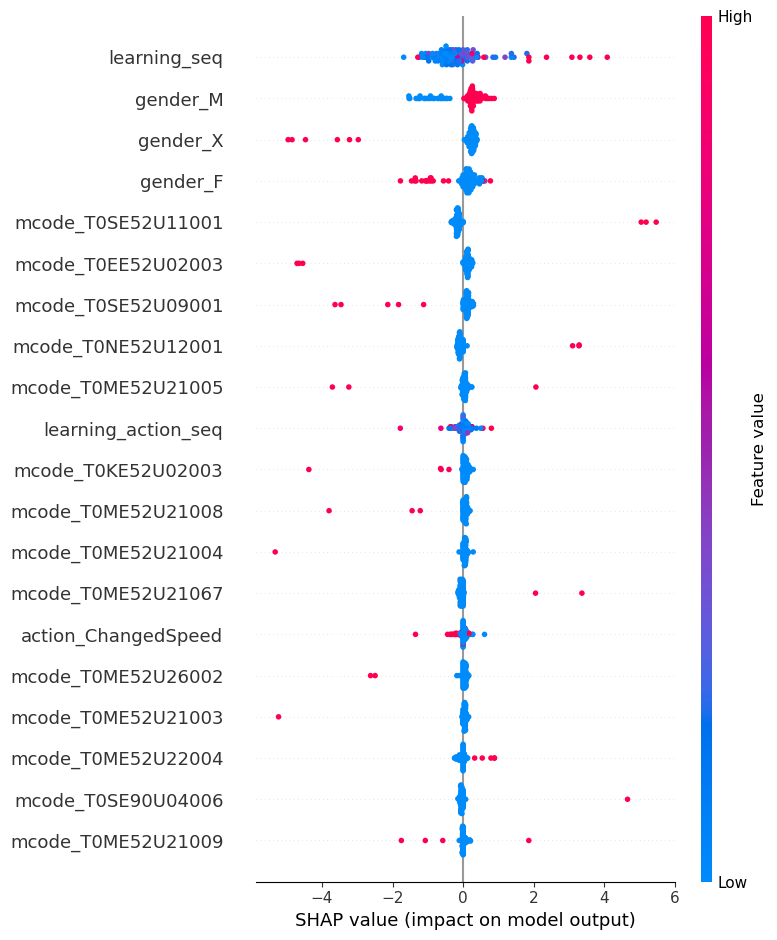

In [60]:
# SHAP 값 형태 확인
print(f"Shape of reshaped_shap_values: {reshaped_shap_values.shape}")

# 샘플 데이터 형태 확인
print(f"Shape of sampled_data: {sampled_data.shape}")

# SHAP 요약 플롯 생성
shap.summary_plot(reshaped_shap_values, sampled_data_df, max_display=20)

#### 검증 세트 결과 (손실, RMSE)

In [30]:
val_loss, val_rmse = model.evaluate(X_val, y_val)
print(f"검증 세트 손실: {val_loss:.4f}")
print(f"검증 세트 RMSE: {val_rmse:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 3.0527 - root_mean_squared_error: 1.7283
검증 세트 손실: 3.2536
검증 세트 RMSE: 1.8038


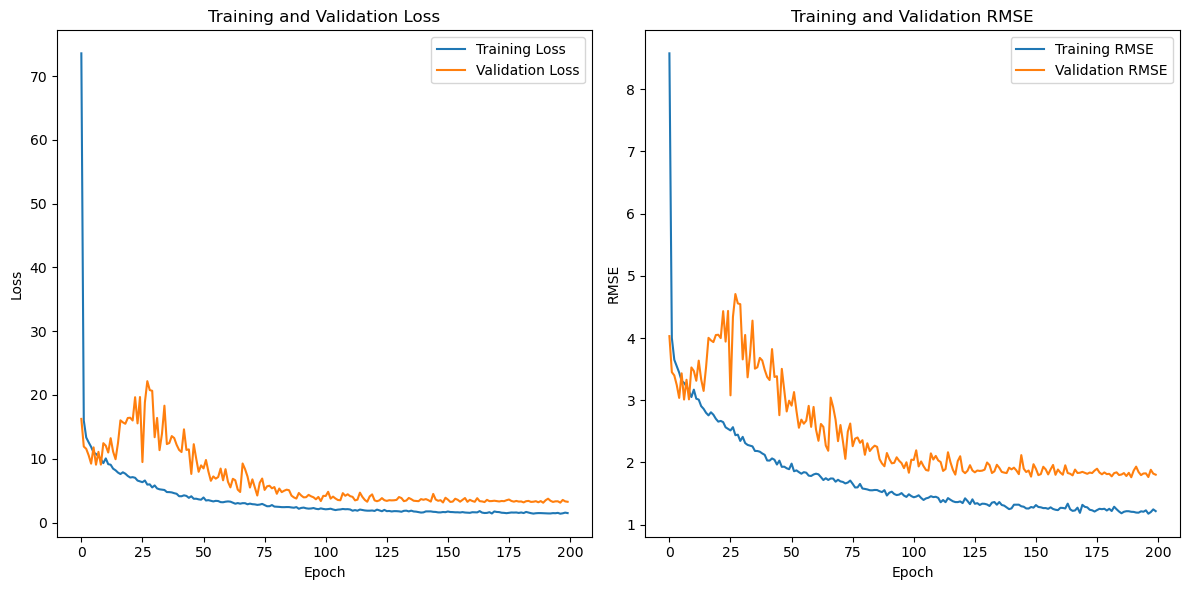

In [31]:
# 손실 및 RMSE 시각화
plt.figure(figsize=(12, 6))

# 손실 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# RMSE 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()

plt.savefig('loss_and_rmse_plot.png', dpi=300, bbox_inches='tight')  # 파일 이름, 해상도, 여백 설정

plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import r2_score

# 예측
y_pred_val = model.predict(X_val).flatten()  # 예측 결과를 1차원으로 변환

# 손실과 RMSE 값 계산
val_loss, val_rmse = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss}")
print(f"Validation RMSE: {val_rmse}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Validation Loss: 3.2535738945007324
Validation RMSE: 1.8037666082382202


In [33]:
# R² 점수 계산
val_r2 = r2_score(y_val, y_pred_val)
print(f"Validation R² Score: {val_r2}")

Validation R² Score: 0.8232337832450867


In [34]:
comparison_df = pd.DataFrame({
   'Actual': y_val.values,
    'Predicted': y_pred_val
})

In [35]:
# 무작위로 10개의 인덱스 선택
np.random.seed(42)  # 결과 재현을 위해 시드 설정
random_indices = np.random.choice(comparison_df.index, size=10, replace=False)
random_indices.sort()  # 선택된 인덱스 정렬 (선택 사항)

In [37]:
# 선택된 인덱스에 해당하는 데이터만 필터링
sample_df = comparison_df.loc[random_indices]

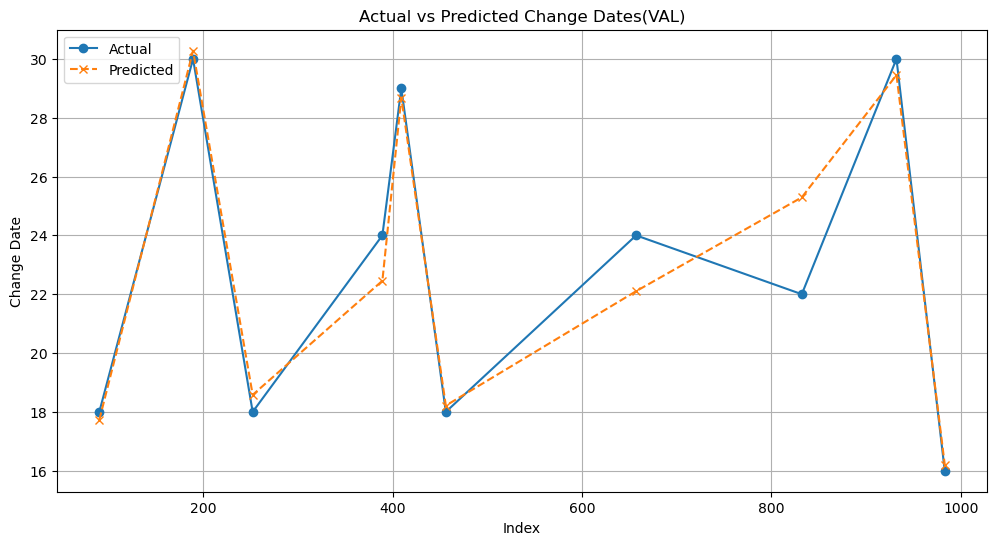

In [38]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(sample_df.index, sample_df['Actual'], label='Actual', marker='o', linestyle='-')
plt.plot(sample_df.index, sample_df['Predicted'], label='Predicted', marker='x', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Change Date')
plt.title('Actual vs Predicted Change Dates(VAL)')
plt.legend()
plt.grid(True)
plt.savefig('Actual_vs_Predicted_Change_Dates_VAL', dpi=300, bbox_inches='tight')  # 파일 이름, 해상도, 여백 설정
plt.show()

In [39]:
print("\nValidation Set 예측 vs 실제 값")
for i in range(len(comparison_df)):
    print(f"예측: {int(comparison_df['Predicted'].iloc[i])}, 실제: {int(comparison_df['Actual'].iloc[i])}")


Validation Set 예측 vs 실제 값
예측: 22, 실제: 22
예측: 29, 실제: 29
예측: 22, 실제: 22
예측: 26, 실제: 27
예측: 18, 실제: 18
예측: 22, 실제: 22
예측: 19, 실제: 20
예측: 19, 실제: 19
예측: 19, 실제: 20
예측: 29, 실제: 30
예측: 22, 실제: 24
예측: 18, 실제: 18
예측: 20, 실제: 20
예측: 18, 실제: 18
예측: 26, 실제: 27
예측: 23, 실제: 24
예측: 23, 실제: 24
예측: 23, 실제: 24
예측: 19, 실제: 20
예측: 25, 실제: 24
예측: 23, 실제: 22
예측: 24, 실제: 24
예측: 18, 실제: 18
예측: 22, 실제: 22
예측: 16, 실제: 16
예측: 27, 실제: 27
예측: 29, 실제: 25
예측: 21, 실제: 22
예측: 18, 실제: 20
예측: 18, 실제: 18
예측: 21, 실제: 27
예측: 18, 실제: 18
예측: 18, 실제: 18
예측: 29, 실제: 30
예측: 20, 실제: 20
예측: 18, 실제: 18
예측: 30, 실제: 30
예측: 19, 실제: 20
예측: 27, 실제: 27
예측: 28, 실제: 29
예측: 22, 실제: 22
예측: 22, 실제: 22
예측: 22, 실제: 22
예측: 30, 실제: 30
예측: 28, 실제: 29
예측: 26, 실제: 27
예측: 18, 실제: 18
예측: 18, 실제: 18
예측: 23, 실제: 24
예측: 24, 실제: 24
예측: 27, 실제: 27
예측: 22, 실제: 22
예측: 24, 실제: 24
예측: 22, 실제: 27
예측: 19, 실제: 20
예측: 24, 실제: 24
예측: 18, 실제: 18
예측: 23, 실제: 24
예측: 27, 실제: 27
예측: 18, 실제: 18
예측: 23, 실제: 24
예측: 20, 실제: 20
예측: 29, 실제: 29
예측: 19, 실제: 19
예측: 26, 실제: 2

### TEST 결과

In [40]:
# 테스트 세트 예측
y_pred_test = model.predict(X_test).flatten()

# 테스트 세트 손실과 RMSE 계산
test_loss, test_rmse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test RMSE: {test_rmse}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
Test Loss: 2.380568027496338
Test RMSE: 1.5429089069366455


In [41]:
# 테스트 세트 R² 점수 계산
test_r2 = r2_score(y_test, y_pred_test)
print(f"Test R² Score: {test_r2}")

Test R² Score: 0.8658647537231445


In [42]:
# 테스트 세트에서 예측
y_pred = model.predict(X_test)

# 예측 결과를 DataFrame으로 변환 (옵션)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


In [43]:
# 예측 결과 확인
pred_df

,Actual,Predicted
2095,18,18.213657
2415,16,16.126562
3045,20,20.337345
351,27,26.782812
5494,24,24.099384
...,...,...
4168,22,25.760632
4251,18,18.213657
5918,24,23.699036
947,18,25.363968


In [44]:
test_comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_test
})

In [45]:
# 무작위로 10개의 인덱스 선택
np.random.seed(42)  # 결과 재현을 위해 시드 설정
random_indices = np.random.choice(test_comparison_df.index, size=10, replace=False)
random_indices.sort()  # 선택된 인덱스 정렬 (선택 사항)

In [46]:
# 선택된 인덱스에 해당하는 데이터만 필터링
sample_test_df = test_comparison_df.loc[random_indices]

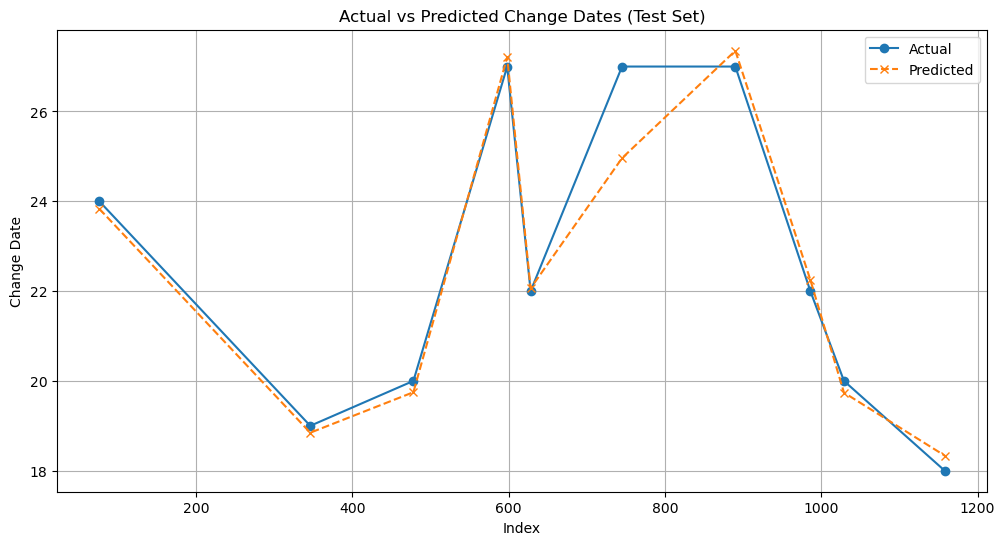

In [47]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(sample_test_df.index, sample_test_df['Actual'], label='Actual', marker='o', linestyle='-')
plt.plot(sample_test_df.index, sample_test_df['Predicted'], label='Predicted', marker='x', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Change Date')
plt.title('Actual vs Predicted Change Dates (Test Set)')
plt.legend()
plt.grid(True)
plt.savefig('Actual_vs_Predicted_Change_Dates_Test_Set', dpi=300, bbox_inches='tight')  # 파일 이름, 해상도, 여백 설정
plt.show()

In [48]:
print("\nTest Set 예측 vs 실제 값")
for i in range(len(test_comparison_df)):
    print(f"예측: {int(test_comparison_df['Predicted'].iloc[i])}, 실제: {int(test_comparison_df['Actual'].iloc[i])}")


Test Set 예측 vs 실제 값
예측: 18, 실제: 18
예측: 16, 실제: 16
예측: 20, 실제: 20
예측: 26, 실제: 27
예측: 24, 실제: 24
예측: 29, 실제: 29
예측: 18, 실제: 18
예측: 18, 실제: 18
예측: 25, 실제: 30
예측: 19, 실제: 19
예측: 22, 실제: 22
예측: 18, 실제: 18
예측: 19, 실제: 19
예측: 17, 실제: 18
예측: 21, 실제: 20
예측: 18, 실제: 18
예측: 18, 실제: 19
예측: 22, 실제: 20
예측: 19, 실제: 19
예측: 19, 실제: 20
예측: 22, 실제: 22
예측: 28, 실제: 24
예측: 16, 실제: 16
예측: 29, 실제: 30
예측: 25, 실제: 24
예측: 18, 실제: 18
예측: 19, 실제: 20
예측: 23, 실제: 22
예측: 18, 실제: 18
예측: 23, 실제: 24
예측: 26, 실제: 27
예측: 20, 실제: 18
예측: 18, 실제: 18
예측: 19, 실제: 18
예측: 18, 실제: 19
예측: 18, 실제: 19
예측: 22, 실제: 22
예측: 24, 실제: 27
예측: 29, 실제: 29
예측: 23, 실제: 22
예측: 28, 실제: 28
예측: 28, 실제: 29
예측: 22, 실제: 25
예측: 25, 실제: 18
예측: 21, 실제: 21
예측: 16, 실제: 16
예측: 28, 실제: 30
예측: 30, 실제: 30
예측: 26, 실제: 27
예측: 23, 실제: 24
예측: 18, 실제: 19
예측: 27, 실제: 27
예측: 24, 실제: 27
예측: 25, 실제: 22
예측: 23, 실제: 24
예측: 27, 실제: 27
예측: 30, 실제: 30
예측: 24, 실제: 22
예측: 18, 실제: 19
예측: 20, 실제: 20
예측: 26, 실제: 27
예측: 26, 실제: 27
예측: 27, 실제: 27
예측: 26, 실제: 27
예측: 23, 실제: 24
예측: 